# THE PROBLEM STATEMENT AND BUSINESS CASE

<p>The goal of this project is to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.</p>

<ul><li>Data includes transactions frequency, amount, tenure etc</li>
    <li>Leverage K-means clustering and PCA to do the segmentation</li></ul>


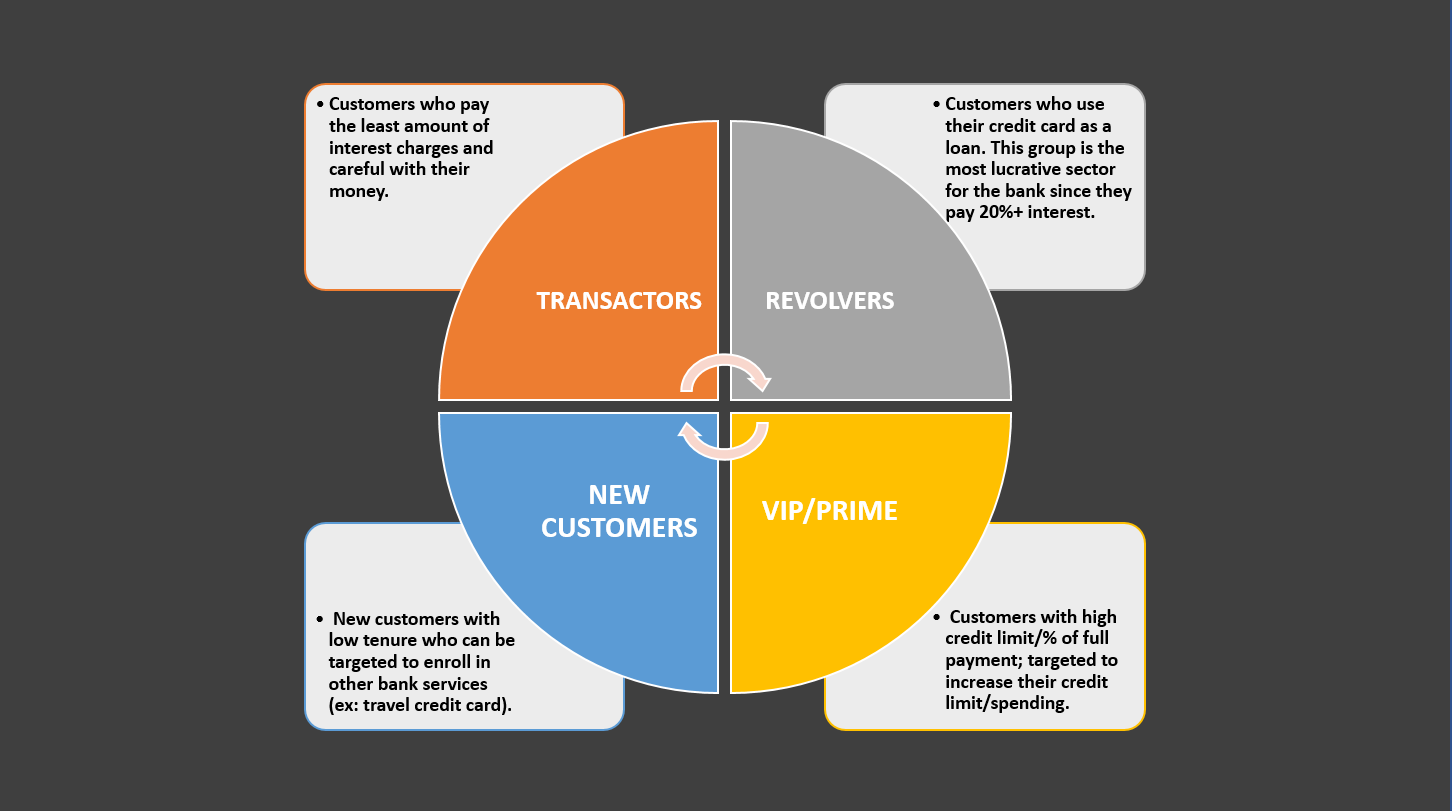

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# IMPORT LIBRARIES AND DATASETS

Let's first import all the packages that you will need during this assignment.
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis. 
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.


In [530]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [531]:
# You have to include the full link to the csv file containing your dataset
creditcard_df = pd.read_csv('C:/Users/Lakshmi/Desktop/UW DataScience application/558 ML/Coursera ML/PCA/CreditCardData.csv')

<li><strong>CUSTID: </strong>Identification of Credit Card holder </li>
<li><strong>BALANCE: </strong>Balance amount left in customer's account to make purchases</li>
<li><strong>BALANCE_FREQUENCY:</strong> How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)</li>
<li><strong>PURCHASES: </strong>Amount of purchases made from account</li>
<li><strong>ONEOFFPURCHASES: </strong>Maximum purchase amount done in one-go</li>
<li><strong>INSTALLMENTS_PURCHASES: </strong> Amount of purchase done in installment</li>
<li><strong>CASH_ADVANCE: </strong>Cash in advance given by the user</li>
<li><strong>PURCHASES_FREQUENCY: </strong>How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)</li>
<li><strong>ONEOFF_PURCHASES_FREQUENCY:</strong> How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)</li>
<li><strong>PURCHASES_INSTALLMENTS_FREQUENCY: </strong>How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)</li>
<li><strong>CASH_ADVANCE_FREQUENCY: </strong>How frequently the cash in advance being paid</li>
<li><strong>CASH_ADVANCE_TRX: </strong>Number of Transactions made with "Cash in Advance"</li>
<li><strong>PURCHASES_TRX: </strong>Number of purchase transactions made</li>
<li><strong>CREDIT_LIMIT: </strong>Limit of Credit Card for user</li>
<li><strong>PAYMENTS: </strong>Amount of Payment done by user</li>
<li><strong>MINIMUM_PAYMENTS: </strong>Percent of full payment paid by user</li>
<li><strong>TENURE: </strong>Tenure of credit card service for user</li>

In [532]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [533]:
# Let's apply info and get additional insights on our dataframe
creditcard_df.info()
# 18 features with 8950 points 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

 
<h3>What is the average, minimum and maximum "BALANCE" amount?</h3>

In [534]:
print("Average, min, max", creditcard_df['BALANCE'].mean(), creditcard_df['BALANCE'].min(), creditcard_df['BALANCE'].max())

Average, min, max 1564.4748276781006 0.0 19043.13856


In [535]:
creditcard_df.describe()# Let's apply describe() and get more statistical insights on our dataframe
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<h3><ol> <li>Obtain the features (row) of the customer who made the maximim "ONEOFF_PURCHASES"</li>

<li>Obtain the features of the customer who made the maximum cash advance transaction? how many cash advance transactions did that customer make? how often did he/she pay their bill?</li></ol></h3>

In [536]:
creditcard_df.query('ONEOFF_PURCHASES == ONEOFF_PURCHASES.max()')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [537]:
creditcard_df.query('CASH_ADVANCE == CASH_ADVANCE.max()')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# VISUALIZE AND EXPLORE DATASET

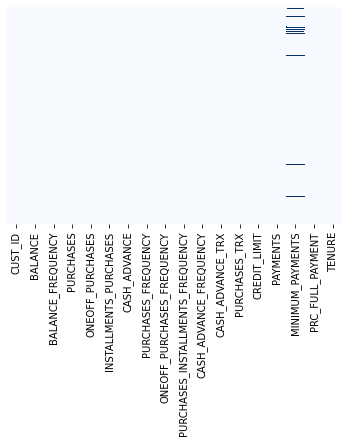

In [538]:
# Let's see if we have any missing data
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues");


In [539]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [540]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


<h3><ol><li> Fill out missing elements in the "CREDIT_LIMIT" column</li>
   <li> Double check and make sure that no missing elements are present</li></ol></h3>

In [541]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [542]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

<h3> Drop Customer ID column 'CUST_ID' and make sure that the column has been removed from the dataframe</h3>

In [543]:
creditcard_df.drop('CUST_ID',axis=1,inplace=True)

In [544]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [545]:
n = len(creditcard_df.columns)
n

17

In [546]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

<p><li>distplot combines the matplotlib.hist function with seaborn kdeplot()</li>
<li>KDE Plot represents the Kernel Density Estimate</li>
<li>KDE is used for visualizing the Probability Density of a continuous variable. </li>
<li>KDE demonstrates the probability density at different values in a continuous variable.</li> </p>

<ul><li>Mean of balance is 1500 dollars</li>
    <li> 'Balance_Frequency' for most customers is updated frequently ~1</li>
    <li>For 'PURCHASES_FREQUENCY', there are two distinct group of customers</li>
    <li> For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently </li>
    <li> Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0</li>
    <li>Credit limit average is around $4500</li>
    <li>Most customers are ~11 years tenure</li></ul>

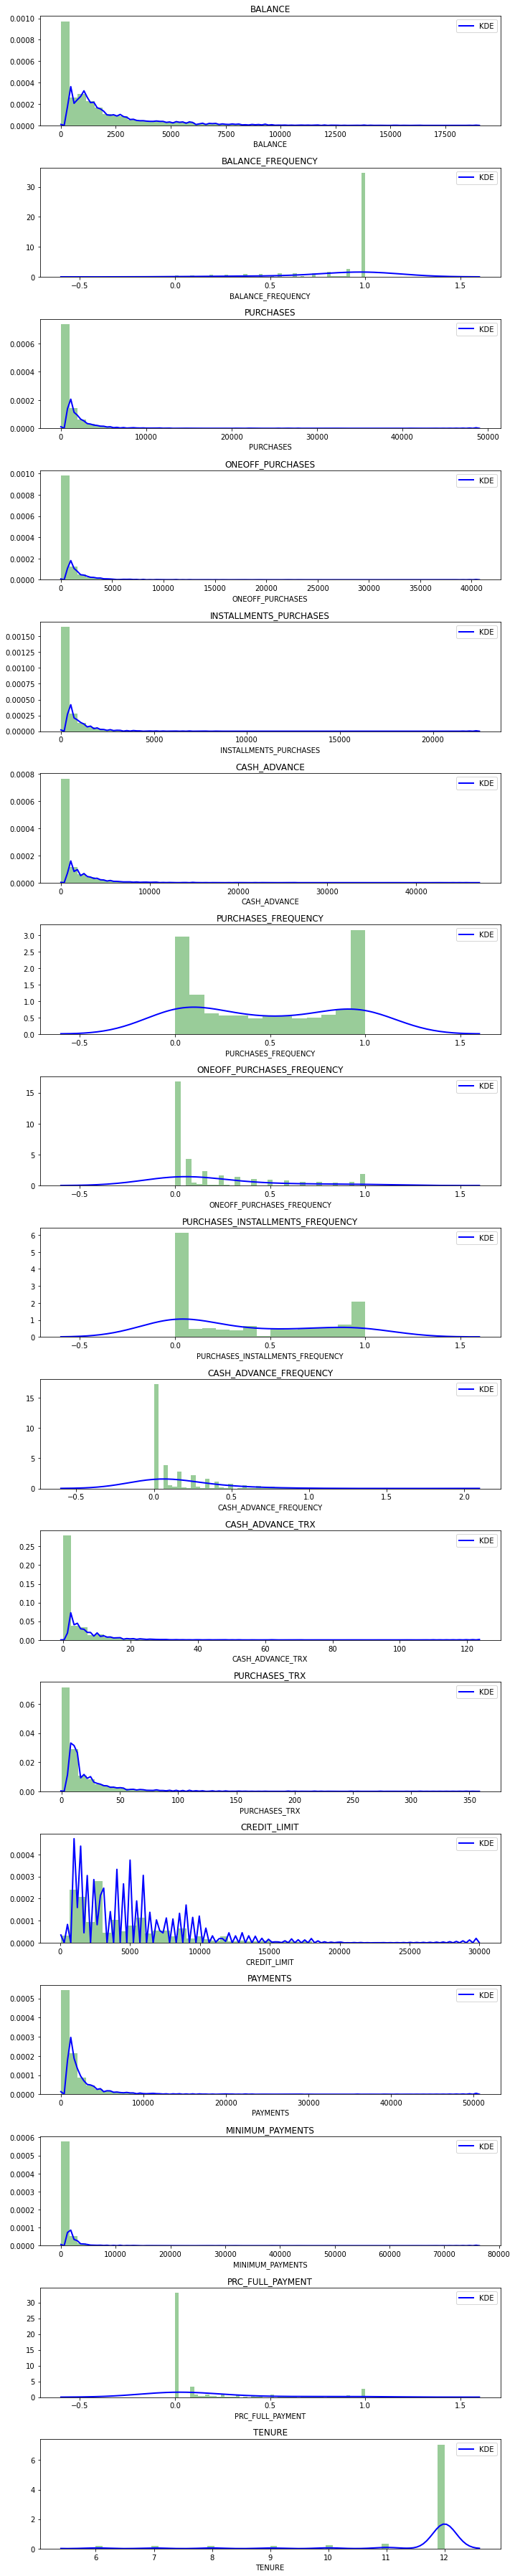

In [547]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"bw":0.2,"color": "b", "lw": 2, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(creditcard_df.columns[i])

plt.tight_layout()


<h3> Obtain the correlation matrix between features</h3>

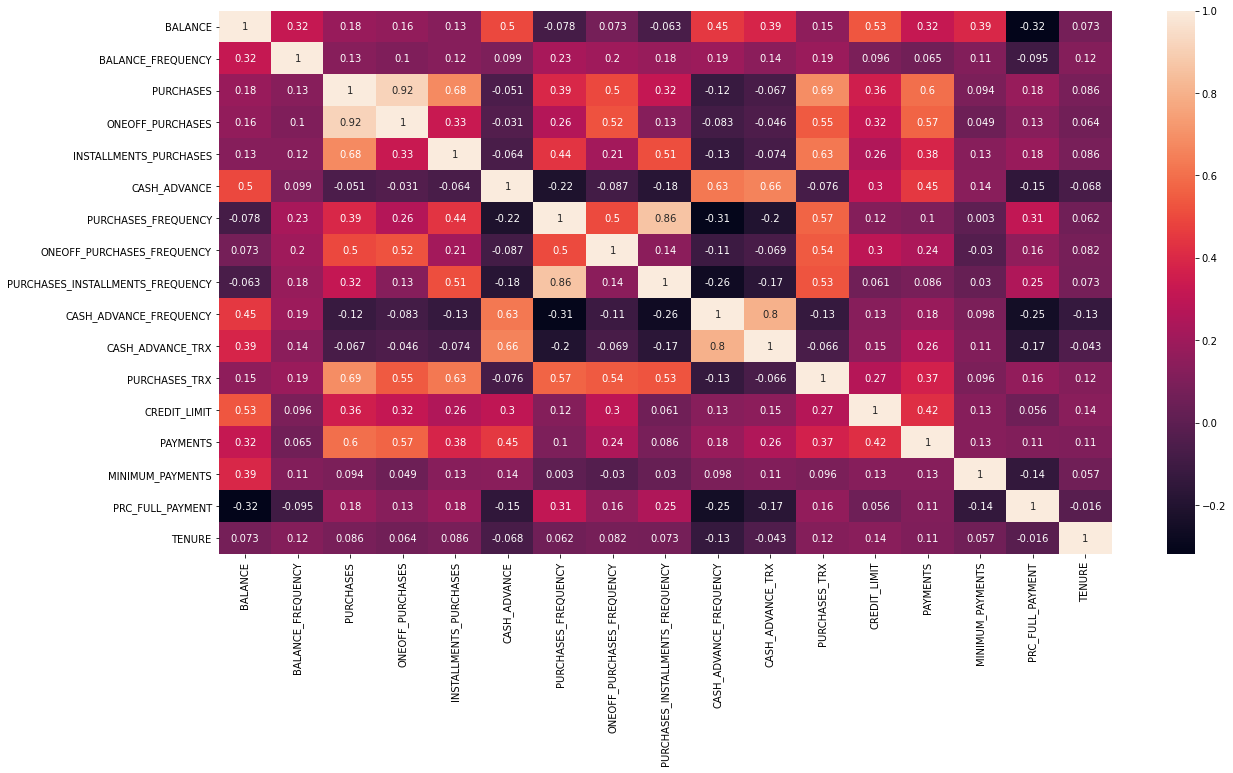

In [548]:
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlations,annot=True);

# UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

<ul><li>K-means is an unsupervised learning algorithm</li>
    <li>It works by grouping some data points together in an unsupervised fashion</li>
    <li>The algorithm groups observations with similar attribute values together by measuring euclidian distance between points</li></ul>
    
    
<strong>Algorithm Steps</strong>
<ul><li>Choose number of clusters "k"</li>
    <li>Select random K points that are going to be the centroids for each cluster</li>
    <li>Assign each data point to the nearest centroid, doing so well enable us to craete "K" number of clusters</li>
    <li>Calculate a new centroid for each cluster</li>
    <li>Reassign each data point to the new closest centroid</li>
    <li>Repeat from step 4 until
        <ol><li>K-means terminates after a fixed number of iterations is reached</li>
            <li>K-means terminates when the centroid locations do not change between iterations</li></ol>
    </li>


# FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [549]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [550]:
creditcard_df_scaled.shape

(8950, 17)

In [551]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

From this we can observe that, the values do not reduce linearly until 8th cluster. 

Text(0, 0.5, 'Within cluster sum of square')

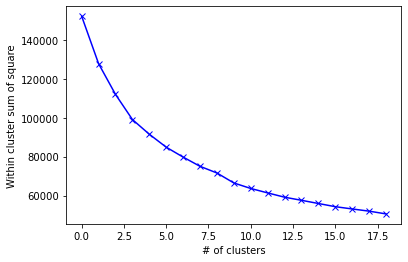

In [552]:
# Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
#       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
#       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
#       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
#       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
#       'TENURE'], dtype='object')

scores_1 = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_)

plt.plot(scores_1,'bx-')
plt.xlabel('# of clusters')
plt.ylabel('Within cluster sum of square')


<h3> Let's assume that our data only consists of the first 6 columns of "creditcard_df_scaled", then the optimal number of clusters would be in this case will be 4  </h3>

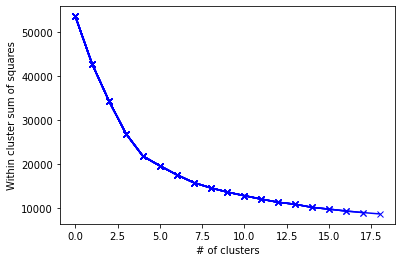

In [553]:
scores_1 = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled[:,:6])
    scores_1.append(kmeans.inertia_)

    plt.plot(scores_1,'bx-')
    plt.xlabel('# of clusters')
    plt.ylabel('Within cluster sum of squares')


#  APPLY K-MEANS METHOD

Choose # of clusters as 4

In [554]:
kmeans = KMeans(4)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_ # labels associated with each data point
# index of the cluster centroid that is closest to x(i)

In [555]:
kmeans.cluster_centers_.shape # centroid for clusters = mu_c(i)

(4, 17)

In [556]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.261639,-0.365886,-0.342751,-0.229921,-0.387825,-0.180124,-0.798672,-0.389057,-0.715298,-0.097036,-0.161529,-0.474947,-0.333726,-0.260906,-0.117233,-0.260321,-0.054371
1,-0.322476,0.241250,0.108456,0.000467,0.255359,-0.366056,0.983339,0.316349,0.874057,-0.463118,-0.360406,0.296385,-0.077171,-0.138892,-0.092136,0.395413,0.058679
2,1.467725,0.384950,-0.234398,-0.164412,-0.252265,1.700434,-0.502199,-0.211784,-0.447558,1.753589,1.627122,-0.281862,0.848503,0.610235,0.491581,-0.405803,-0.095863
3,0.954485,0.462694,3.125845,2.713251,2.406470,-0.155091,1.136338,1.798653,1.065918,-0.319096,-0.170458,3.003251,1.429882,1.919096,0.477421,0.454703,0.324140


<ul><li><strong>First Customers cluster (Transactors): </strong>Those are customers who pay least amount of interest charges and careful with their money, Cluster with lowest balance (105 dollars) and cash advance (308 dollars), Percentage of full payment = 23%</li>
<li><strong>Second customers cluster (revolvers) </strong> who use credit card as a loan (most lucrative sector): highest balance (5000 dollars) and cash advance (~5000 dollars), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)</li>
<li><strong>Third customer cluster (VIP/Prime):</strong> high credit limit dollars 16K and highest percentage of full payment, target for increase credit limit and increase spending habits</li>
<li><strong>Fourth customer cluster (low tenure):</strong> these are customers with low tenure (7 years), low balance</li></ul>

In [557]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1019.894654,0.790596,270.911237,210.815386,60.362203,601.142327,0.169805,0.086394,0.080160,0.115726,2.146513,2.904415,3280.217708,977.845284,591.001028,0.077575,11.444556
1,893.268379,0.934421,1234.923638,593.212350,641.985258,211.235499,0.885012,0.296831,0.711810,0.042470,0.789318,22.076855,4213.670698,1331.065514,649.486614,0.269366,11.595846
2,4619.420501,0.968462,502.409949,319.547916,182.947831,4544.760508,0.288794,0.139278,0.186567,0.486055,14.352743,7.703797,7581.649405,3499.713871,2009.815326,0.035024,11.389030
3,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100


In [558]:
labels.shape # Labels associated to each data point

(8950,)

In [559]:
labels.max()

3

In [560]:
labels.min()

0

In [561]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([1, 3, 0, ..., 0, 1, 1])

In [562]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'CLUSTER':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


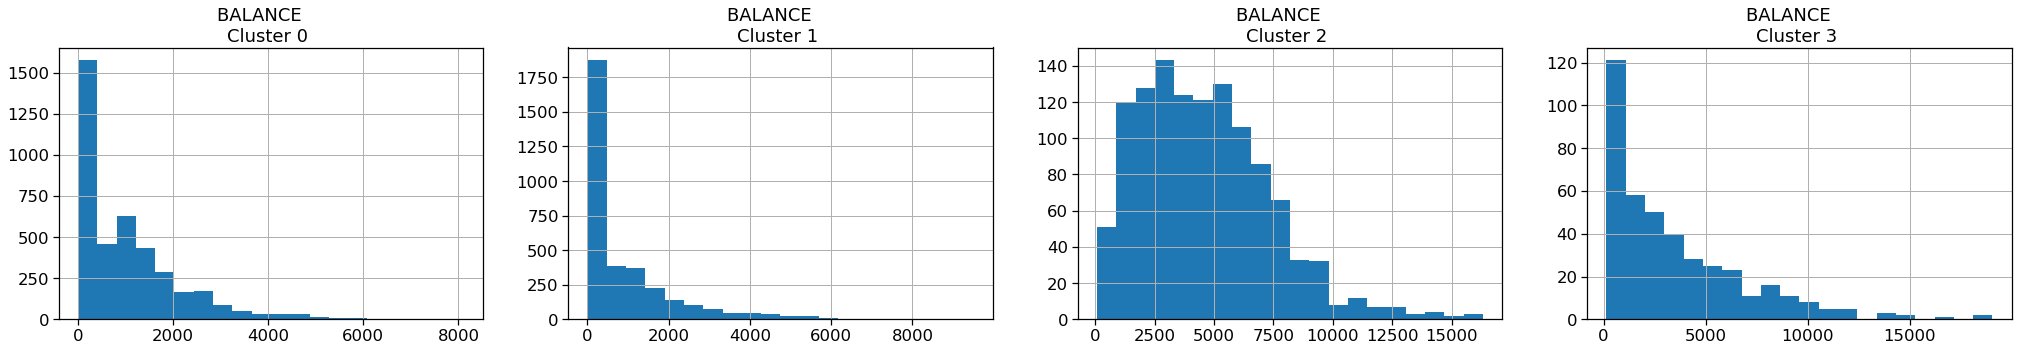

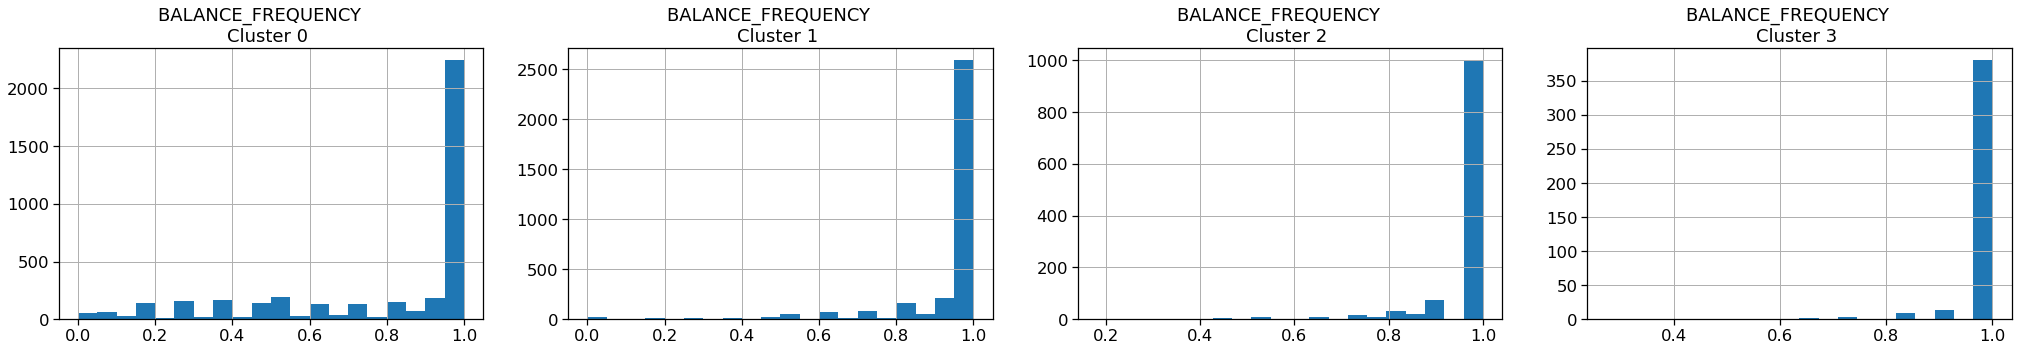

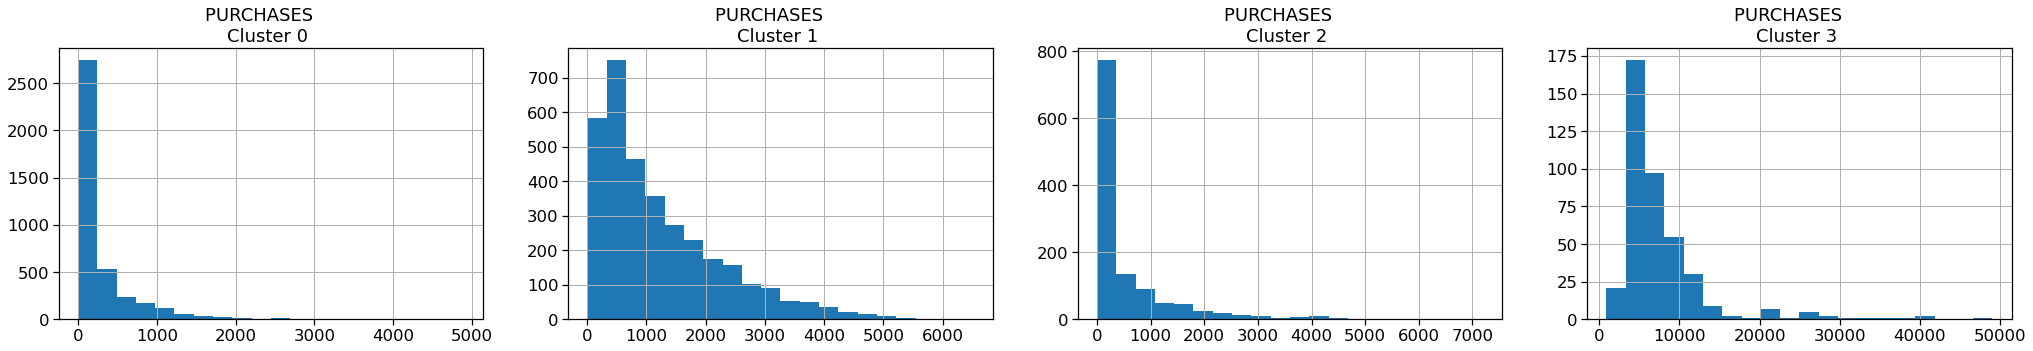

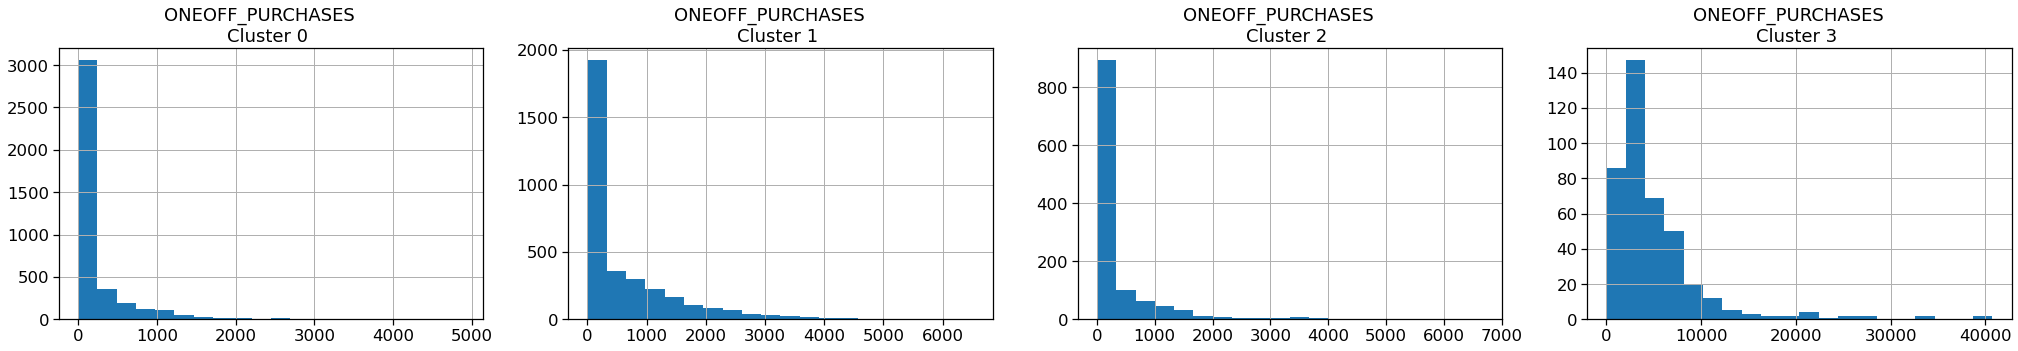

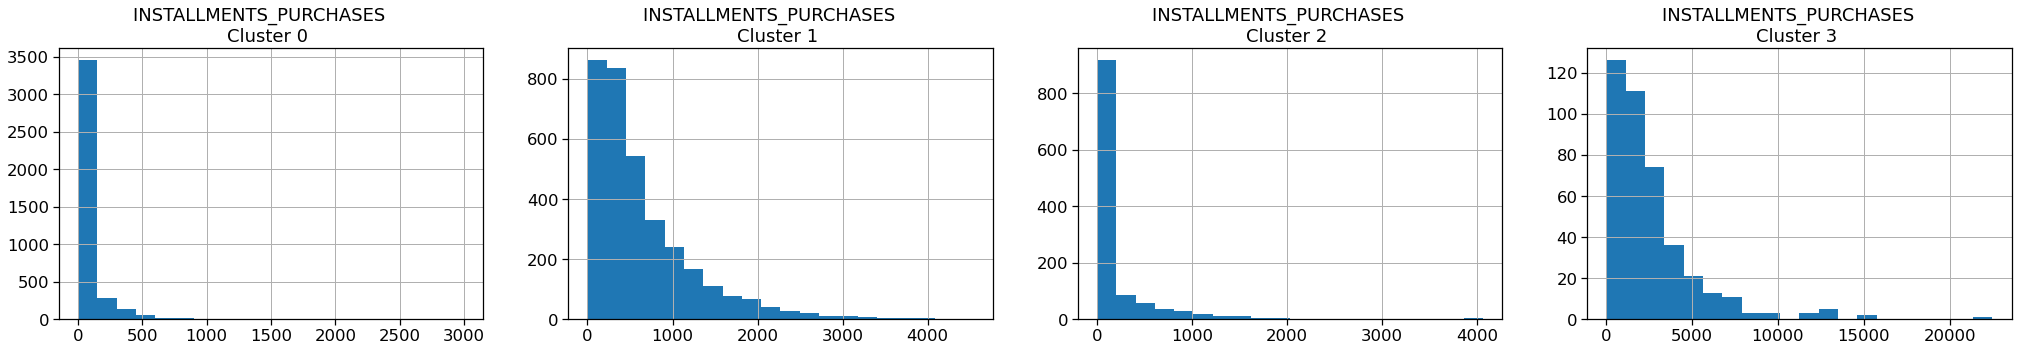

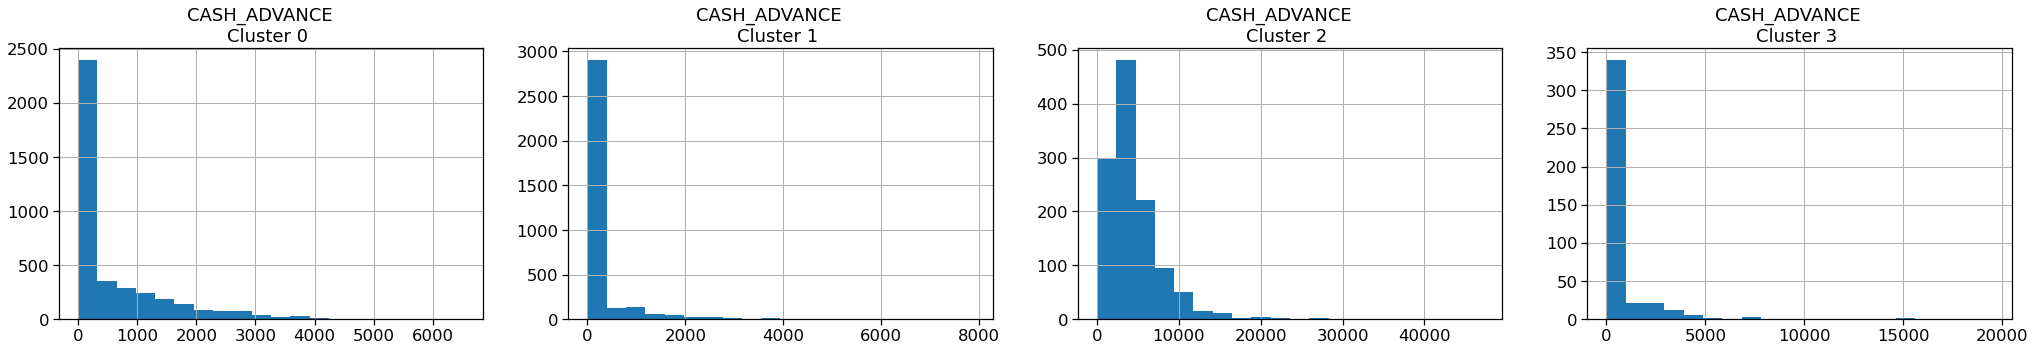

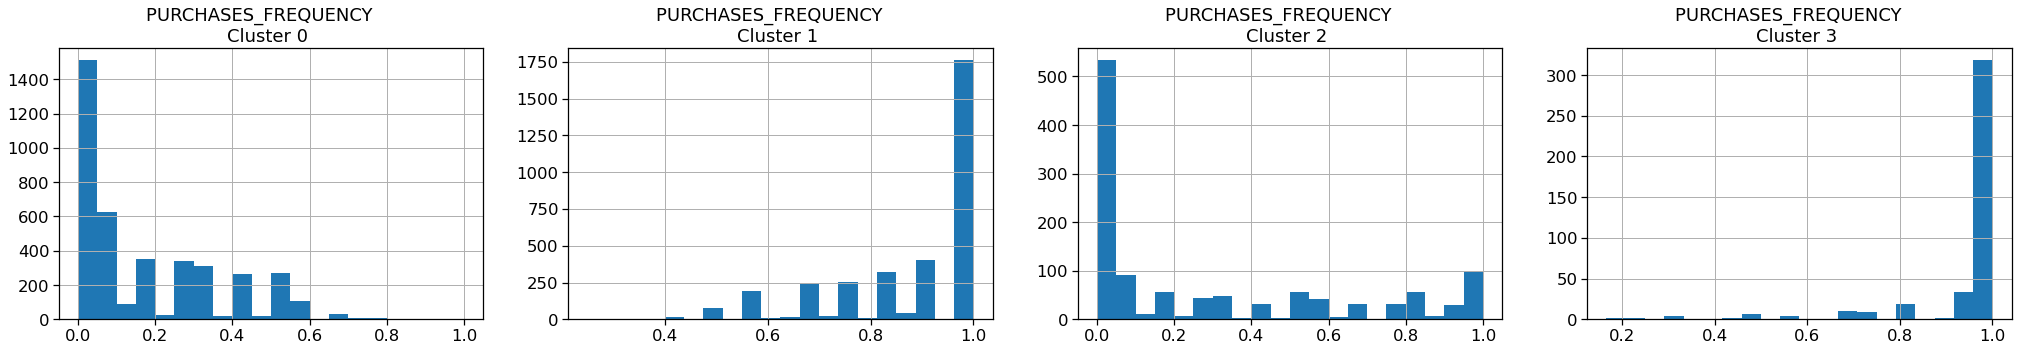

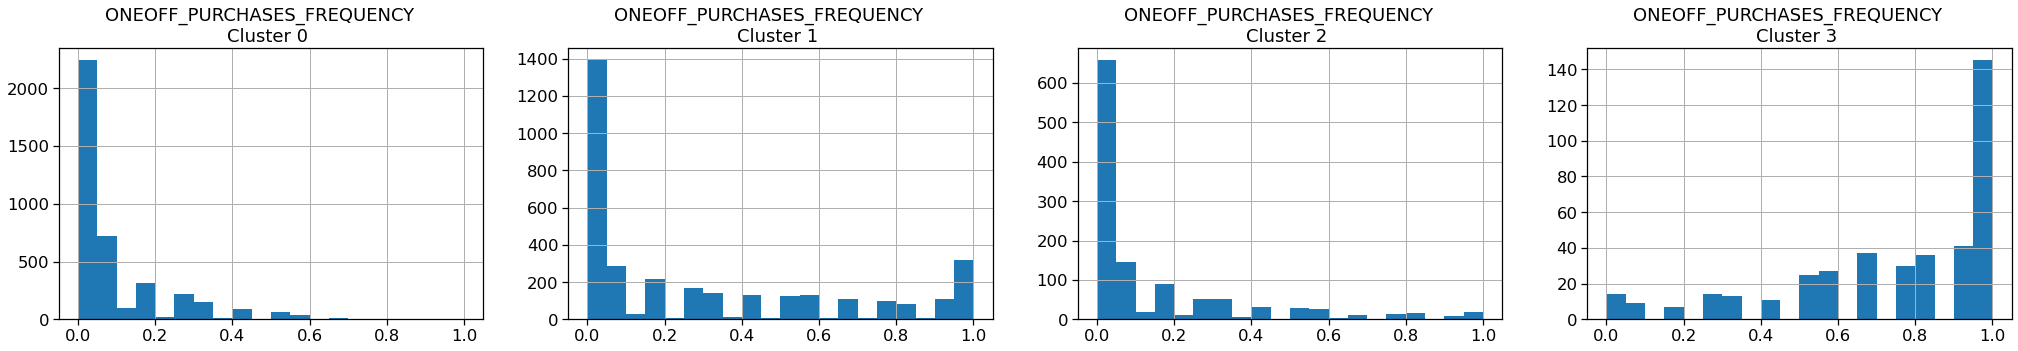

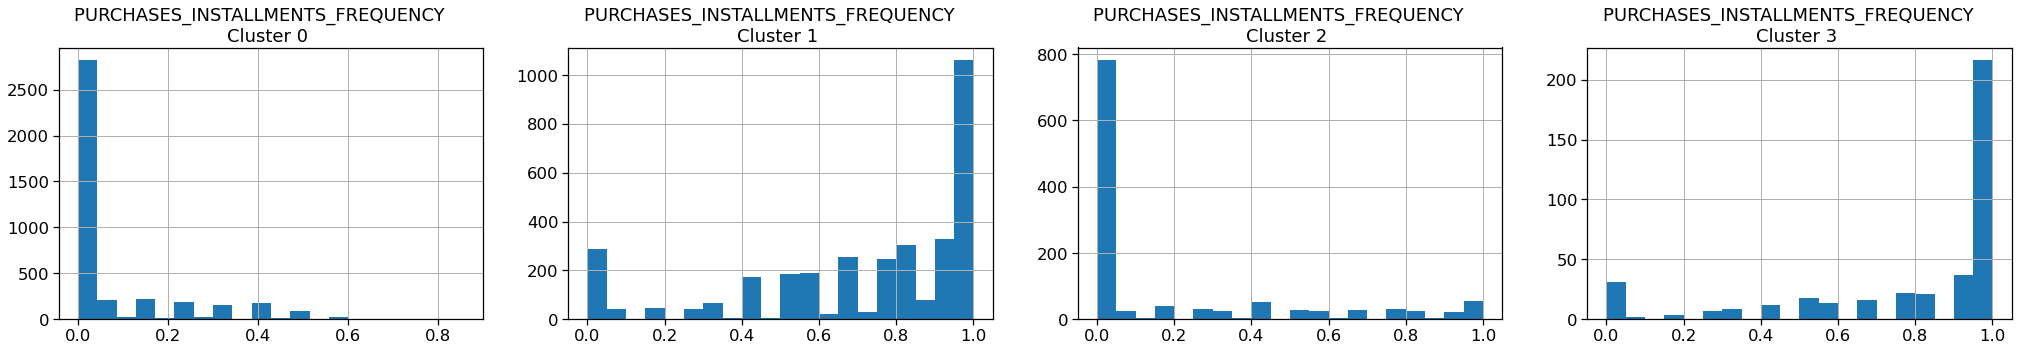

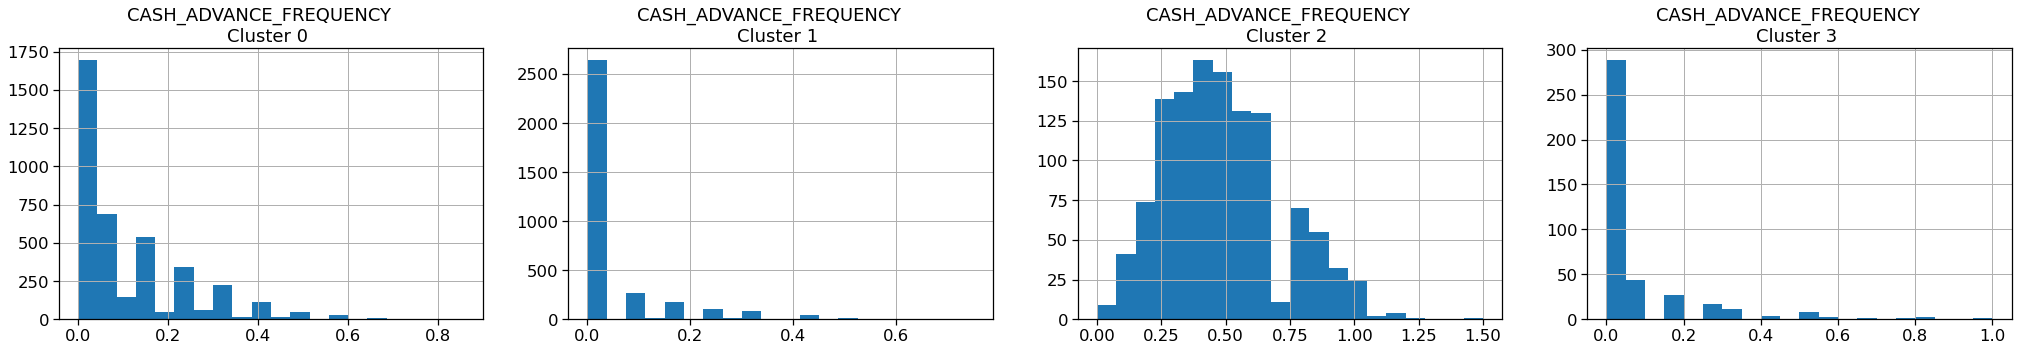

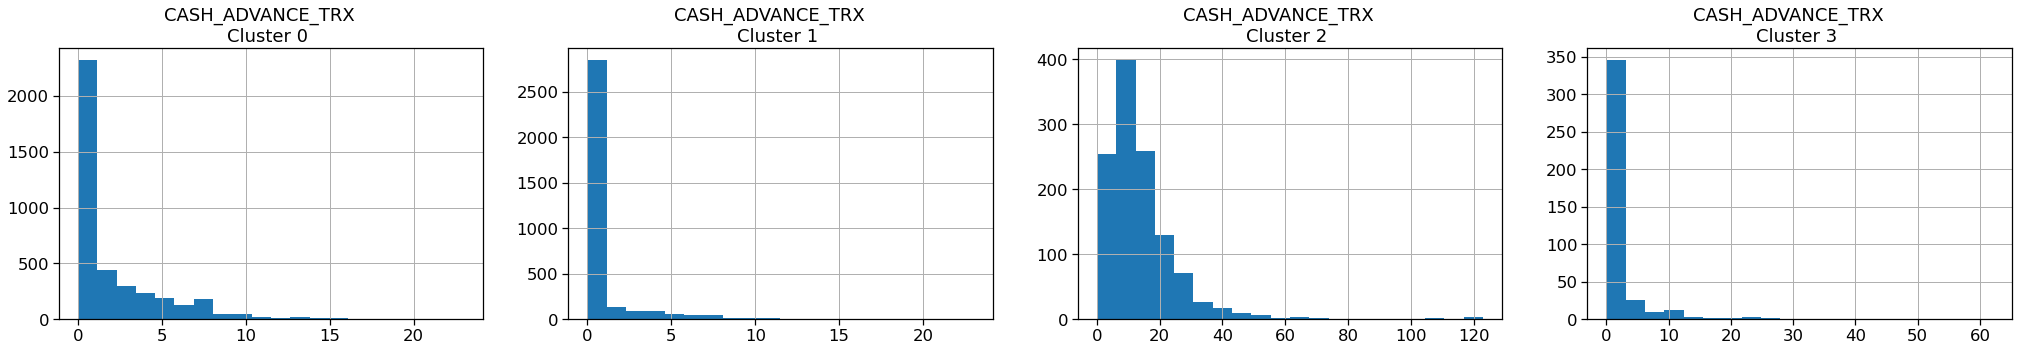

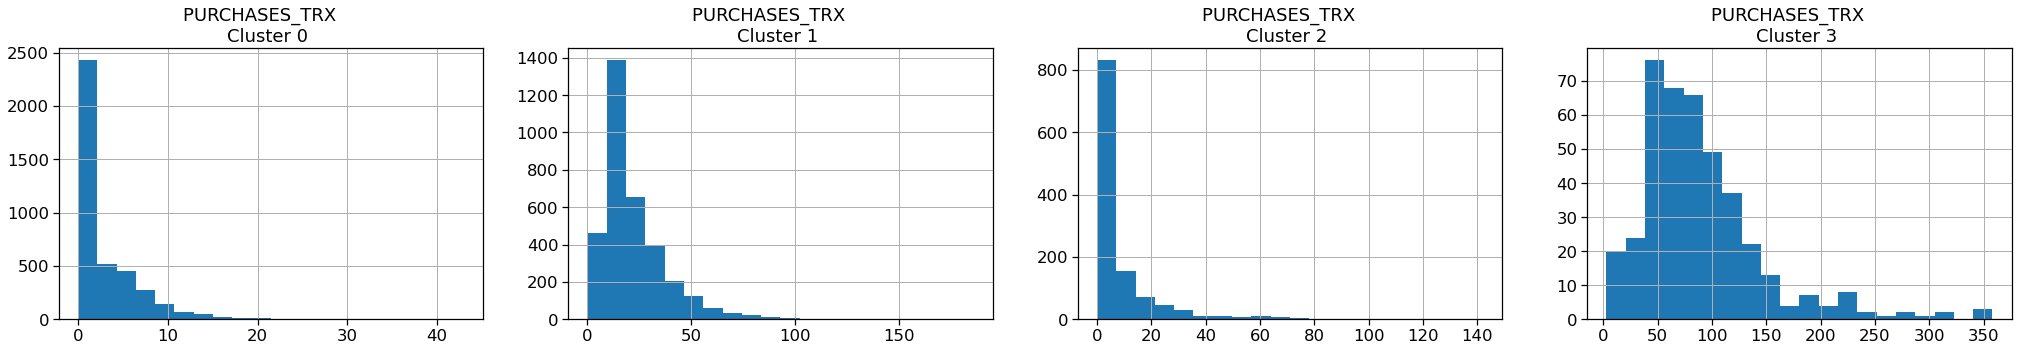

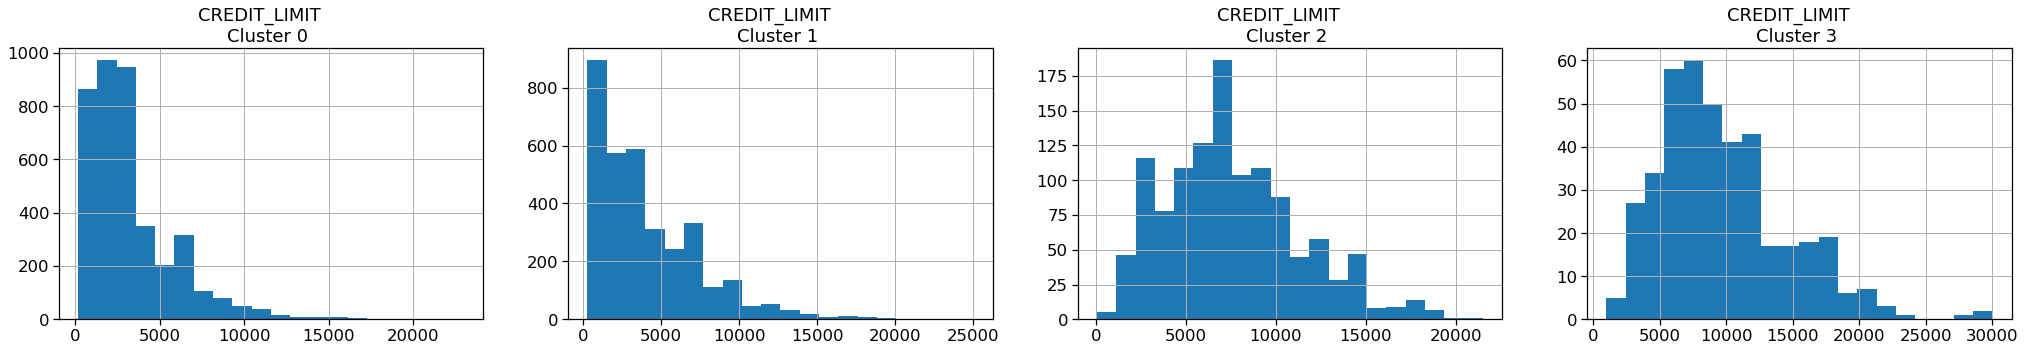

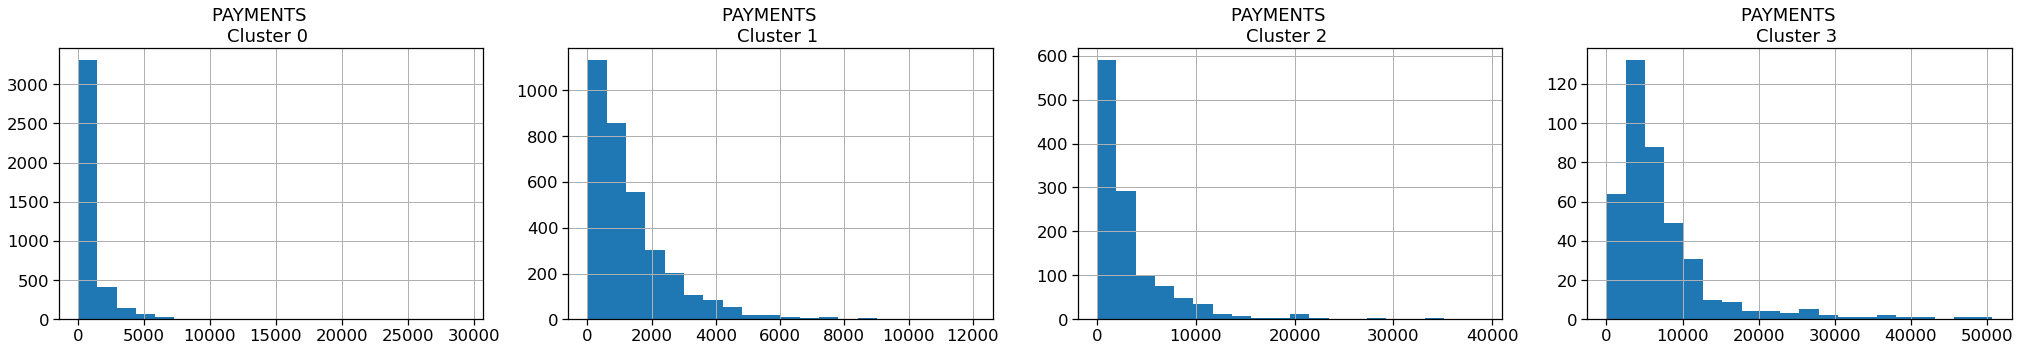

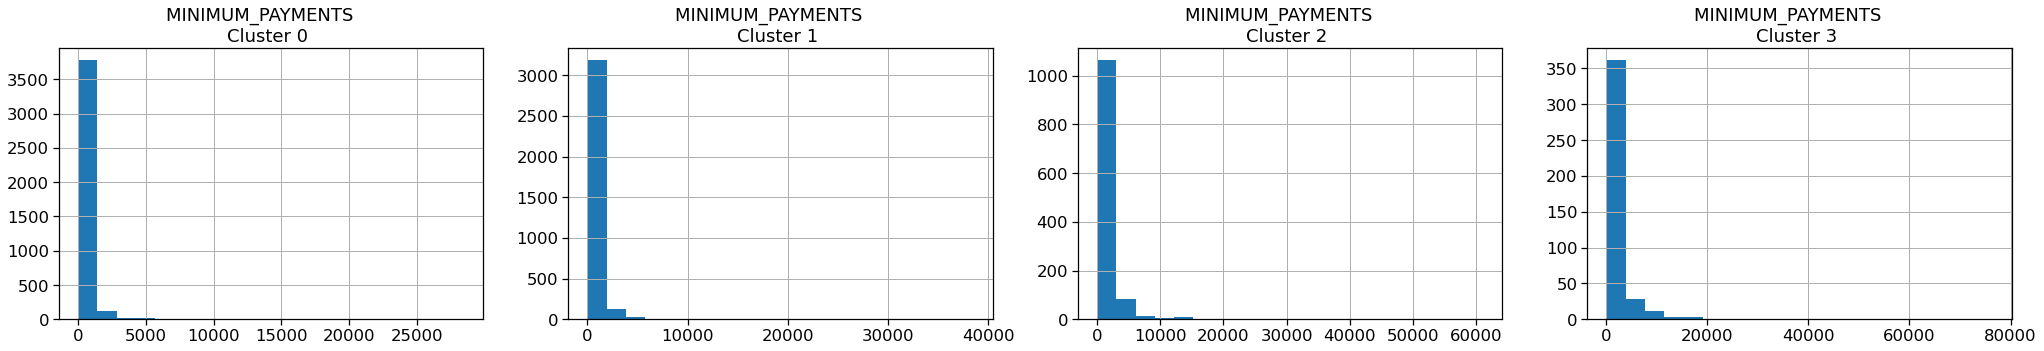

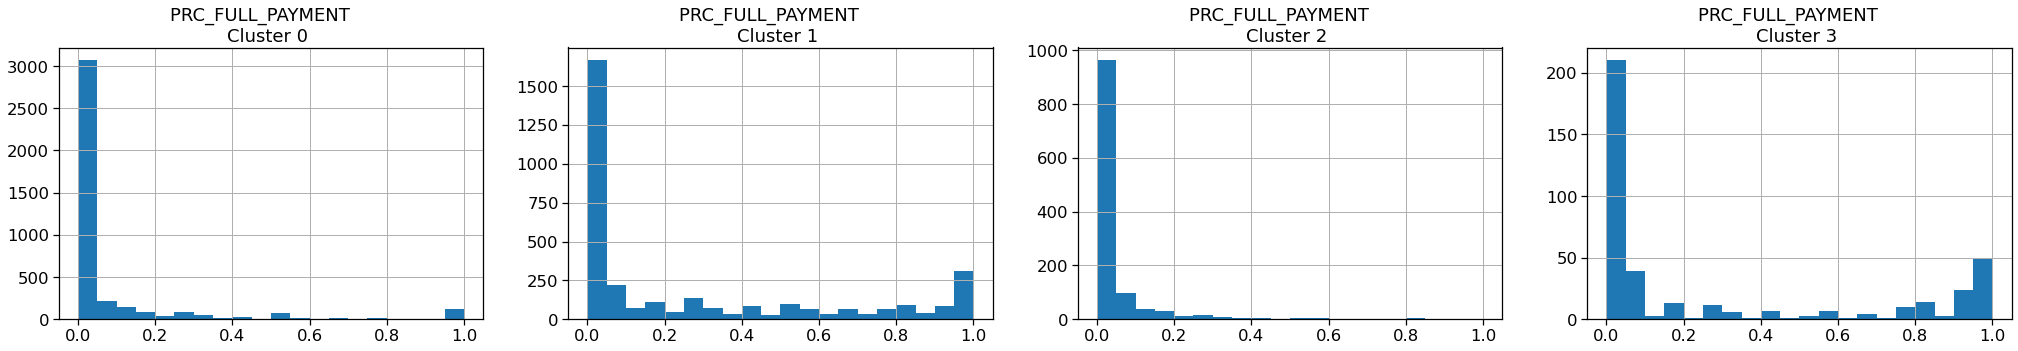

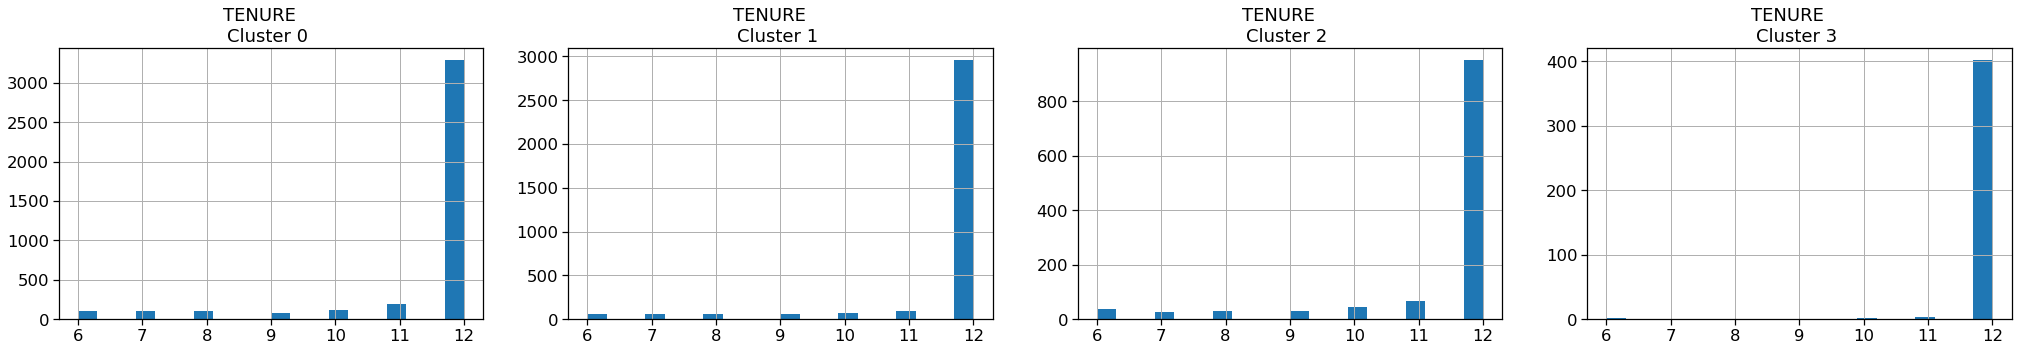

In [583]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
    plt.figure(figsize = (35, 5))
    for j in range(4):
        plt.subplot(1,4,j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['CLUSTER'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {} '.format(i,j))
  
    plt.show()

#  APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

<ul><li>PCA performs dimensionality reduction while keeping the original information unchanged</li>
    <li>PCA finds new set of features called components, which are composites of the uncorrelated given input features</li></ul>


<h3> Estimate the number of components </h3>

In [564]:
C = np.cov(X,bias=True) # C = empirical covariance matrix

eigenValues, eigenVectors = np.linalg.eig(C)
idx = eigenValues.argsort()[::-1] 
# sort eigen values in desc order and get their indices
print()
p=1 # number of PCs
sum_p_eigenvalues =0
sum_d_eigenvalues =np.sum(eigenValues[idx])
while sum_p_eigenvalues/sum_d_eigenvalues < 0.99:
    for j in idx[:p]:
        sum_p_eigenvalues+=eigenValues[j]
    p += 1

print("required # of PCs",p-1) # bcoz p is already incremented by 1


required # of PCs 3


<h3> Original scores </h3>

X shape: (17, 8950)


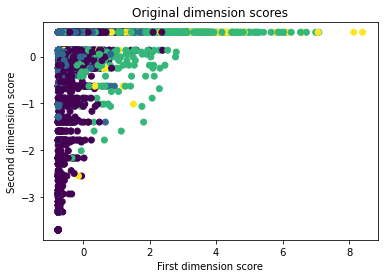

In [565]:
X = creditcard_df_scaled.T
print("X shape:", X.shape)
plt.scatter(X[0, :], X[1, :], c=labels)
plt.xlabel('First dimension score')
plt.ylabel('Second dimension score')
plt.title("Original dimension scores")
plt.show()

<h3> Principal Component analysis using Power Iteration </h3>

In [566]:
def powerIter(C,V):
    
    max_iter=1000
    iter_num =0
    results_dict = {}
    lamda_hist = []
    
    while iter_num < max_iter :
        z = C.dot(V)
        V=z/np.linalg.norm(z)
        eigval_lamda = (V.T).dot(C).dot(V) # (1 * d).(d * d).(d * 1) = 1 * 1
        eigval_lamda = eigval_lamda.item() # gets the value from 2d array
        results_dict[eigval_lamda] = V 
        lamda_hist.append(eigval_lamda)
        iter_num += 1
    
    
    return iter_num, lamda_hist,results_dict 
    

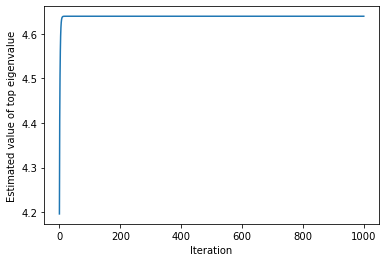

Estimated first eigenvalue: 4.639306326976705
First PC *********
[ 0.1010775   0.12004342  0.41164155  0.34640703  0.33681432 -0.02334324
  0.32149284  0.2946332   0.27470974 -0.08913903 -0.04865394  0.39069524
  0.21166292  0.26624897  0.06035128  0.13211231  0.0810205 ]


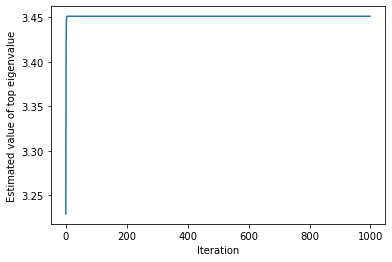

Estimated second eigenvalue: 3.45133852662873
Second PC *********
[ 0.40395722  0.13053705  0.04103786  0.06287187 -0.0185328   0.43924153
 -0.19078025 -0.01792382 -0.17860091  0.43408232  0.41973386 -0.01939408
  0.23867794  0.25747607  0.16696952 -0.19002551 -0.00432648]


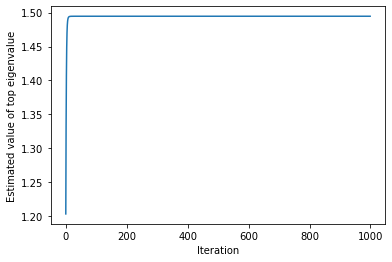

Estimated third eigenvalue: 1.494636506025961
Third PC *********
[ 0.16007504  0.42062987 -0.25790273 -0.39211489  0.11048839  0.0273454
  0.37469147 -0.11513072  0.47340919  0.10907217  0.1155405   0.07733064
 -0.10048344 -0.27623652  0.22163462 -0.12477356  0.06432602]


In [567]:
d,n = X.shape
C = np.cov(X,bias=True) # d * d
V = np.random.rand(d,1)
iter_num, lamda_hist,results_dict  = powerIter(C,V)
lamda_hist.sort() # sort the list in ascending order
lamda_first = lamda_hist[-1] #highest lamda or highest eigen value
first_PC_eigvec = results_dict[lamda_first] 
plt.plot(lamda_hist)
plt.xlabel('Iteration')
plt.ylabel('Estimated value of top eigenvalue')
plt.show()
print("Estimated first eigenvalue:", lamda_first)
print("First PC *********")
print(first_PC_eigvec.flatten())

C = np.cov(X,bias=True)
C = C -  lamda_first *(first_PC_eigvec.dot(first_PC_eigvec.T))
V = np.random.rand(d,1)
iter_num, lamda_hist,results_dict  = powerIter(C,V)
lamda_hist.sort() # sort the list
lamda_second = lamda_hist[-1] #highest lamda - sorting in asc order (highest eigen value)
second_PC_eigvec = results_dict[lamda_second] 
plt.plot(lamda_hist)
plt.xlabel('Iteration')
plt.ylabel('Estimated value of top eigenvalue')
plt.show()
print("Estimated second eigenvalue:", lamda_second)
print("Second PC *********")
print(second_PC_eigvec.flatten())

C = np.cov(X,bias=True)
C = C - lamda_first *(first_PC_eigvec.dot(first_PC_eigvec.T)) - lamda_second *(second_PC_eigvec.dot(second_PC_eigvec.T))
V = np.random.rand(d,1)
iter_num, lamda_hist,results_dict  = powerIter(C,V)
lamda_hist.sort() # sort the list
lamda_third = lamda_hist[-1] #highest lamda - sorting in asc order (highest eigen value)
third_PC_eigvec = results_dict[lamda_third] 
plt.plot(lamda_hist)
plt.xlabel('Iteration')
plt.ylabel('Estimated value of top eigenvalue')
plt.show()
print("Estimated third eigenvalue:", lamda_third)
print("Third PC *********")
print(third_PC_eigvec.flatten())

V shape:  (3, 17)
Z.shape:  (17, 8950)

       pca1      pca2      pca3
0 -1.682220 -1.076451 -0.488507
1 -1.138295  2.506477 -0.601212
2  0.969684 -0.383520 -0.102371
3 -0.873628  0.043166 -1.460167
4 -1.599434 -0.688581 -0.365094

scores shape: (3, 8950)


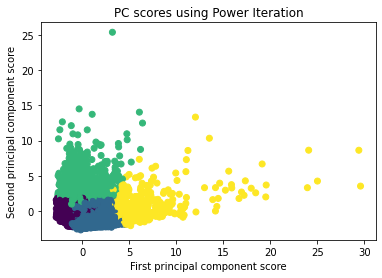

In [568]:
V = np.vstack((first_PC_eigvec.flatten(), second_PC_eigvec.flatten(),third_PC_eigvec.flatten())) 
print("V shape: ",V.shape) 
Z = X # X is already scaled
print("Z.shape: ",Z.shape)
scores = V.dot(Z)  
print()
pca_scores = pd.DataFrame(data = scores.T, columns =['pca1','pca2','pca3'])
print(pca_scores.head())
print()
print("scores shape:", scores.shape)
plt.scatter(scores[0, :], scores[1, :], c=labels)
plt.xlabel('First principal component score')
plt.ylabel('Second principal component score')
plt.title("PC scores using Power Iteration")
plt.show()


<h3> Principal Component analysis using Skicit learn </h3>

In [569]:
# Obtain the principal components 
pca=PCA(n_components=3)
pca.fit(creditcard_df_scaled)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [570]:
print('****First Eigen value***')
print(pca.explained_variance_[0])
print('*******First principal component*****')
print(pca.components_[0])
print()
print('****Second Eigen value***')
print(pca.explained_variance_[1])
print('*******Second principal component:*****')
print(pca.components_[1])
print()
print('****Third Eigen value***')
print(pca.explained_variance_[2])
print('*******Third principal component:*****')
print(pca.components_[2])

****First Eigen value***
4.639824743147719
*******First principal component*****
[ 0.10107753  0.12004342  0.41164155  0.34640703  0.33681432 -0.02334326
  0.32149285  0.2946332   0.27470974 -0.0891391  -0.04865388  0.39069523
  0.21166291  0.26624898  0.06035127  0.13211231  0.08102049]

****Second Eigen value***
3.4517241940601986
*******Second principal component:*****
[ 0.40395747  0.13053697  0.04103763  0.0628716  -0.01853285  0.43924092
 -0.19078021 -0.01792369 -0.17860088  0.43408285  0.41973355 -0.01939406
  0.23867781  0.25747671  0.16696947 -0.19002546 -0.0043265 ]

****Third Eigen value***
1.4948034972718494
*******Third principal component:*****
[-0.16008601 -0.42063054  0.25790034  0.39211242 -0.11048951 -0.02734326
 -0.37469288  0.11513173 -0.47340693 -0.10903862 -0.11557161 -0.07732495
  0.10048708  0.27624051 -0.22163093  0.12477317 -0.06432304]


scores shape: (3, 8950)


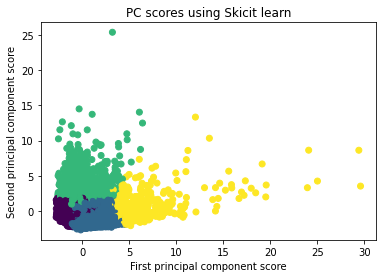

,pca1,pca2,pca3
0,-1.682220,-1.076451,0.488499
1,-1.138295,2.506476,0.601230
2,0.969684,-0.383520,0.102358
3,-0.873628,0.043165,1.460164
4,-1.599434,-0.688581,0.365082


In [571]:
# Create a dataframe with the 4 components
sklearn_scores  = pca.transform(creditcard_df_scaled)


print("scores shape:", scores.shape)
plt.scatter(sklearn_scores [:, 0], sklearn_scores [:, 1], c=labels)
plt.xlabel('First principal component score')
plt.ylabel('Second principal component score')
plt.title("PC scores using Skicit learn")
plt.show()


pca_sklearn_scores = pd.DataFrame(data = sklearn_scores, columns =['pca1','pca2','pca3'])
pca_sklearn_scores.head()

<h3>Combine pca scores with cluster information</h3>

In [572]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_sklearn_scores,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df

,pca1,pca2,pca3,cluster
0,-1.682220,-1.076451,0.488499,0
1,-1.138295,2.506476,0.601230,2
2,0.969684,-0.383520,0.102358,1
3,-0.873628,0.043165,1.460164,0
4,-1.599434,-0.688581,0.365082,0
...,...,...,...,...
8945,-0.359629,-2.016145,-0.995376,1
8946,-0.564369,-1.639123,-1.290257,1
8947,-0.926204,-1.810786,-0.474743,1
8948,-2.336552,-0.657966,0.974722,0


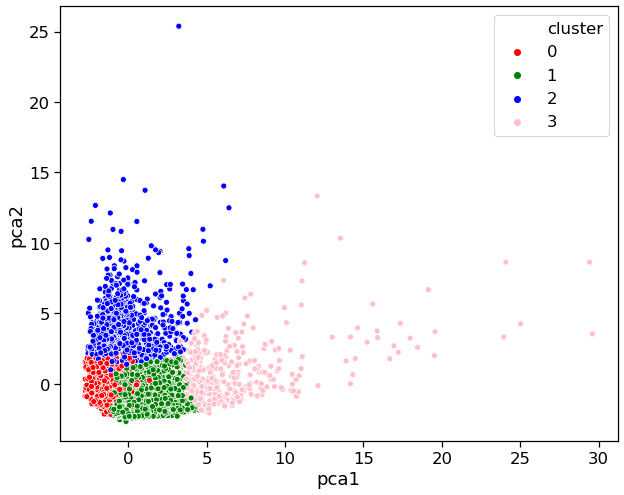

In [579]:
plt.figure(figsize=(10,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2})

ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink'])
ax.figure.savefig('C:/Users/Lakshmi/Desktop/UW DataScience application/558 ML/Coursera ML/PCA/PCA.jpg');

In [574]:
# Reconstruct

print('Projected data from PCA method:', scores[0,:10])
print()
print('Projected data from scikit-learn:', sklearn_scores[:10,0])
print()
X_reconstruct = V.T.dot(scores)
print('Reconstructed X:', X_reconstruct[0,:10])
print()
X_orig = X
print('Original X:', X_orig[0,:10])
print()

#Avg square projection error/total variation in data
np.sum((np.linalg.norm(X_orig - X_reconstruct))**2)/np.sum((np.linalg.norm(X_orig))**2)

Projected data from PCA method: [-1.68222026 -1.1382949   0.96968401 -0.87362773 -1.59943384  0.25129386
  6.35292031  0.27710287 -0.44174395 -0.5625095 ]

Projected data from scikit-learn: [-1.68222025 -1.13829496  0.96968405 -0.87362774 -1.59943381  0.25129389
  6.35292027  0.2771029  -0.44174394 -0.56250951]

Reconstructed X: [-0.6830723   0.80121425 -0.07329966 -0.30460326 -0.49826622 -0.10843059
  0.02916636 -0.20063658 -0.26181453 -0.51764917]

Original X: [-0.73198937  0.78696085  0.44713513  0.04909914 -0.3587753   0.11787839
 -0.45027722  0.12452002 -0.26402625 -0.67850402]



0.43615992002168114